In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df_trade=pd.read_csv("C:\\Users\\cohen\\OneDrive\\Desktop\\UVA\\Capstone\\Data\\congress-trading-all.xlsx - Sheet1.csv")

In [193]:
df_trade.head()
df_trade.columns

Index(['ReportDate', 'TransactionDate', 'Ticker', 'Representative',
       'Transaction', 'Amount', 'Party', 'House', 'Range'],
      dtype='object')

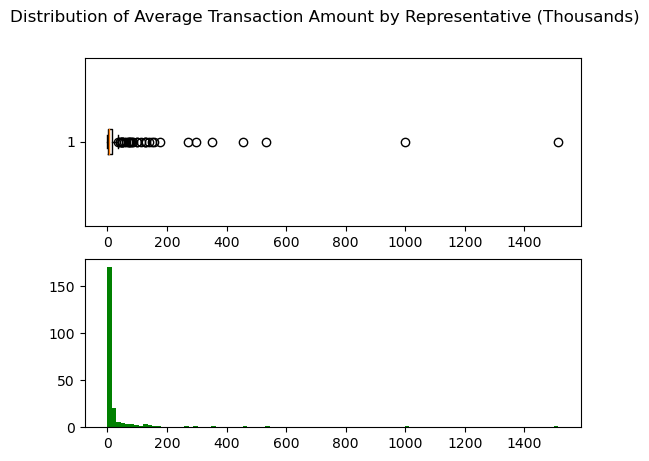

In [49]:
mean_amounts=df_trade.groupby(['Representative'])['Amount'].mean()
mean_thou=mean_amounts/1000
fig, (ax,axs)=plt.subplots(2)
fig.suptitle('Distribution of Average Transaction Amount by Representative (Thousands)')
ax.boxplot(mean_thou,vert=False)
axs.hist(mean_thou, bins=100, color='green')
plt.show()

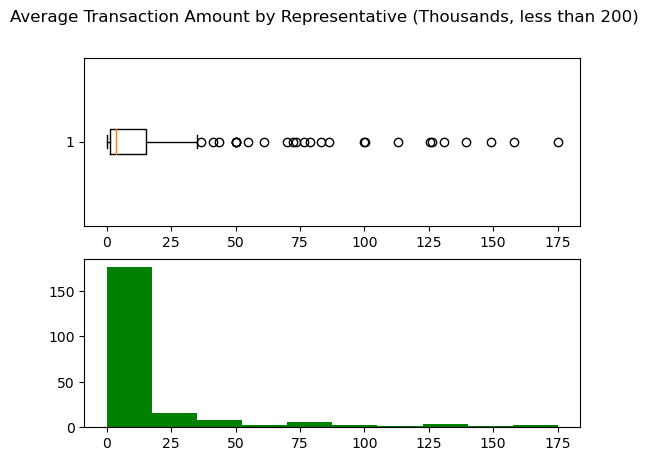

In [72]:
twohundo=mean_thou[mean_thou<=200]
fig1, (ax1,axs1)=plt.subplots(2)
fig1.suptitle('Average Transaction Amount by Representative (Thousands, less than 200)')
ax1.boxplot(twohundo,vert=False)
axs1.hist(twohundo, color='green')
plt.show()

In [45]:
#mean_thou[(np.abs(stats.zscore(mean_thou)) < 3)]
print("Num outliers (z-score: 3):", len(mean_thou[(np.abs(stats.zscore(mean_thou)) >= 3)]))
print("Num outliers (z-score: 1):",len(mean_thou[(np.abs(stats.zscore(mean_thou)) >= 1)]))
print("Variance:",np.var(mean_thou))

Num outliers (z-score: 3): 4
Num outliers (z-score: 1): 8
Variance: 17905.66847110804


In [74]:
print("For average transactions less than 200 thousand")
print("Num outliers (z-score: 3):", len(twohundo[(np.abs(stats.zscore(twohundo)) >= 3)]))
print("Num outliers (z-score: 1):",len(twohundo[(np.abs(stats.zscore(twohundo)) >= 1)]))
print("Variance:",np.var(twohundo))

For average transactions less than 200 thousand
Num outliers (z-score: 3): 8
Num outliers (z-score: 1): 23
Variance: 930.2512531880112


In [69]:
dirty=list(mean_thou[(np.abs(stats.zscore(mean_thou)) >= 1)].sort_values(ascending=False).index)
df_trade[df_trade['Representative'].isin(dirty)]

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range
915,2023-06-22,2023-06-15,MSFT,Nancy Pelosi,Purchase,500001.0,D,Representatives,"$500,001"
916,2023-06-22,2023-06-15,AAPL,Nancy Pelosi,Purchase,250001.0,D,Representatives,"$250,001-$1,000,000"
1081,2023-06-06,2023-05-08,AAPL,Nancy Pelosi,Sale,500001.0,D,Representatives,"$500,001"
2106,2023-04-06,2023-03-17,AAPL,Nancy Pelosi,Purchase,500001.0,D,Representatives,"$500,001"
2907,2023-01-12,2022-12-21,GOOGL,Nancy Pelosi,Sale,500001.0,D,Representatives,"$500,001"
...,...,...,...,...,...,...,...,...,...
28795,2017-12-21,2017-11-01,LVLT,Michael Bennet,Sale,50001.0,D,Senate,"$50,001 - $100,000"
28821,2017-12-08,2017-11-06,HALO,Mark Warner,Sale,500001.0,D,Senate,"$500,001 - $1,000,000"
28948,2017-11-14,2017-10-18,XON,Mark Warner,Sale,1000001.0,D,Senate,"$1,000,001 - $5,000,000"
28949,2017-11-14,2017-10-18,ZIOP,Mark Warner,Sale,250001.0,D,Senate,"$250,001 - $500,000"


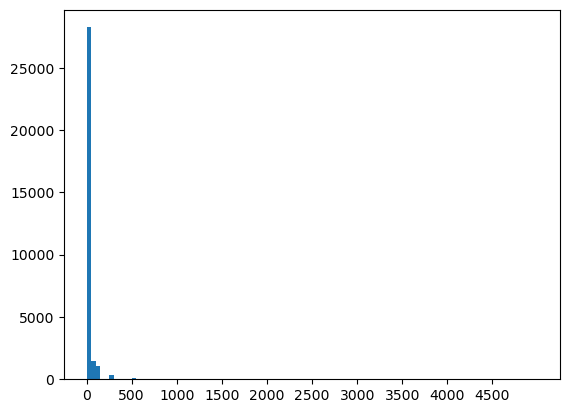

In [89]:
plt.hist(df_trade['Amount']/1000,bins=100)
plt.xticks(range(0,5000,500))
plt.show()

In [107]:
print("Num trades less than 500000:",len(df_trade[df_trade['Amount']<500000]))
print("Total Num Trades:",len(df_trade))
print(100-len(df_trade[df_trade['Amount']<500000])/len(df_trade)*100,"percent of trades are greater than 50,000")
print("Mean trade amount value:", np.mean(df_trade['Amount']))
print("Std dev of trade amount:", np.std(df_trade['Amount']))

Num trades less than 500000: 31063
Total Num Trades: 31237
0.5570317251976888 percent of trades are greater than 50,000
Mean trade amount value: 16903.007497839102
Std dev of trade amount value: 120442.40973209163


In [112]:
print("Number of trades greater than 500,000 for each representative:")
print(df_trade[df_trade['Amount']>=500000]['Representative'].value_counts())

Number of trades greater than 50,000 for each representative:
Nancy Pelosi            48
Mark Dr Green           32
Suzan K. Delbene        17
Dianne Feinstein        13
David Perdue            11
Kelly Loeffler          10
Greg Gianforte           6
Kevin Hern               5
Patrick Fallon           5
Mark Warner              4
Nicholas V. Taylor       3
Nicholas Van Taylor      2
Michael Bennet           2
Bradley S. Schneider     2
Kim Schrier              2
Kim Dr Schrier           2
Scott Franklin           2
John Hickenlooper        2
Mr. Scott Franklin       1
John W. Rose             1
Victoria Spartz          1
Thomas Macarthur         1
Bill Hagerty             1
Tommy Tuberville         1
Name: Representative, dtype: int64


In [122]:
#print(list(set(list(df_trade[df_trade['Amount']>=500000]['Representative'].value_counts().index)).intersection(set(dirty))))
dirty

['John W. Rose',
 'Kim Schrier',
 'Mark Warner',
 'Michael Bennet',
 'Mr. Scott Franklin',
 'Nancy Pelosi',
 'Nicholas V. Taylor',
 'Suzan K. Delbene']

In [137]:
print('Average Trade Amount:')
print(df_trade.groupby(['Party','House'])['Amount'].mean().sort_values(ascending=False))
print()
print('Std Dev Trade Amount:')
print(df_trade.groupby(['Party','House'])['Amount'].std().sort_values(ascending=False))
print()
print('Num Trades by Party and House:')
print(df_trade.groupby(['Party','House'])['Amount'].count())

Average Trade Amount:
Party  House          
D      Senate             24584.333333
R      Representatives    22353.645885
       Senate             19591.848586
D      Representatives    11729.000149
I      Representatives     6445.444444
       Senate              1001.000000
Name: Amount, dtype: float64

Std Dev Trade Amount:
Party  House          
R      Senate             153174.303541
D      Representatives    134262.193598
       Senate              80257.759558
R      Representatives     64226.758381
I      Representatives      7022.838560
       Senate                  0.000000
Name: Amount, dtype: float64

Num Trades by Party and House:
Party  House          
D      Representatives    14632
       Senate              1992
I      Representatives       18
       Senate                33
R      Representatives     8421
       Senate              6010
Name: Amount, dtype: int64


In [157]:
buys=pd.DataFrame(df_trade[df_trade['Transaction']=='Purchase'].groupby('Representative')['Amount'].sum().sort_index()).reset_index()
sales=pd.DataFrame(df_trade[df_trade['Transaction']=='Sale'].groupby('Representative')['Amount'].sum().sort_index()).reset_index()

In [177]:
sale=sales[sales['Representative'].isin(buys['Representative'])].set_index('Representative')
buy=buys[buys['Representative'].isin(sales['Representative'])].set_index('Representative')
buy['Sale Amount']=sale
buy

,Amount,Sale Amount
Representative,,
A. Mitchell Jr. McConnell,24024.00,500002.00
Adam Kinzinger,15015.00,10010.00
Alan S. Lowenthal,700331.17,936505.49
Andrew Garbarino,5005.00,5005.00
Angus King,8008.00,25025.00
...,...,...
W. Greg Steube,2002.00,1001.00
Warren Davidson,31003.00,80003.00
William R. Keating,59059.00,13013.00


In [179]:
buy=buy.rename(columns={'Amount':'Buy Amount'})
buy['Profit']=buy['Sale Amount']-buy['Buy Amount']
buy

,Buy Amount,Sale Amount,Profit
Representative,,,
A. Mitchell Jr. McConnell,24024.00,500002.00,475978.00
Adam Kinzinger,15015.00,10010.00,-5005.00
Alan S. Lowenthal,700331.17,936505.49,236174.32
Andrew Garbarino,5005.00,5005.00,0.00
Angus King,8008.00,25025.00,17017.00
...,...,...,...
W. Greg Steube,2002.00,1001.00,-1001.00
Warren Davidson,31003.00,80003.00,49000.00
William R. Keating,59059.00,13013.00,-46046.00


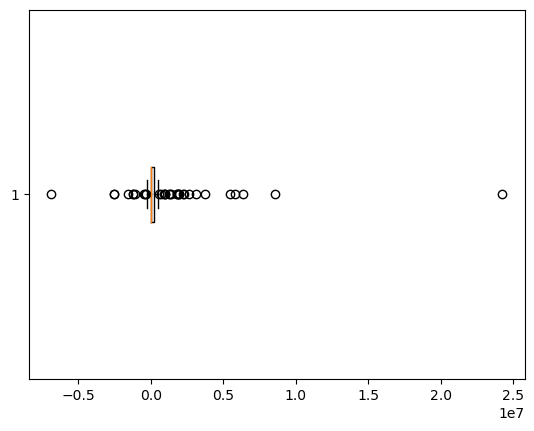

In [183]:
plt.boxplot(buy['Profit'],vert=False)
plt.show()

In [185]:
buy[(np.abs(stats.zscore(buy['Profit'])) >= 3)]

,Buy Amount,Sale Amount,Profit
Representative,,,
Daniel Goldman,2781315.0,11338819.0,8557504.0
Kelly Loeffler,12565108.0,36782269.0,24217161.0
Kevin Hern,10881488.0,3995086.0,-6886402.0


KeyError: 'Representative'